In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
# Working on the MNIST dataset using kernel SVM
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits.data.shape)

(1797, 64)


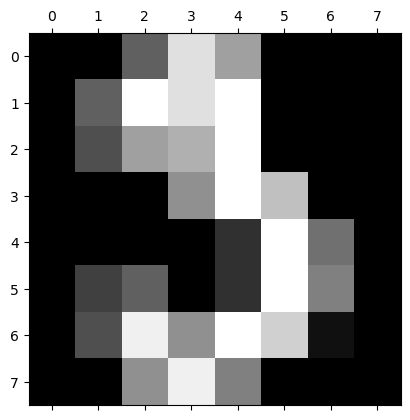

In [5]:

plt.matshow(digits.images[489] , cmap = "gray")

In [6]:
# flattening the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
labels = digits.target

If we corelate the numbers as grayscale values we can see this next array is the matrix representation of the image

In [7]:
data[489] 

array([ 0.,  0.,  6., 14., 10.,  0.,  0.,  0.,  0.,  6., 16., 14., 16.,
        0.,  0.,  0.,  0.,  5., 10., 11., 16.,  0.,  0.,  0.,  0.,  0.,
        0.,  9., 16., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,
        0.,  0.,  4.,  6.,  0.,  3., 16.,  8.,  0.,  0.,  5., 15.,  9.,
       16., 13.,  1.,  0.,  0.,  0.,  9., 15.,  8.,  0.,  0.,  0.])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=69)

We have split the data into train and test section with the ratio 70:30 

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Imported required library functions for working with MNIST
We will be using RBF ( Radial Basis Function ) ( Pseduo-Transforms data into infinite dimension )

In [10]:
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X_train , y_train)

SVC()

In [11]:
y_pred = clf.predict(X_test)

Make Prediction and Print Accuracy Report

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100 , "%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 98.14814814814815 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.94      1.00      0.97        47
           2       1.00      1.00      1.00        50
           3       1.00      0.96      0.98        57
           4       1.00      0.97      0.98        58
           5       0.96      0.98      0.97        50
           6       1.00      0.98      0.99        54
           7       1.00      1.00      1.00        52
           8       0.93      0.95      0.94        55
           9       0.98      0.98      0.98        62

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Confusion Matrix:
 [[55  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  2  0  0  0  0]
 [ 0  0  0  0 56  0  0  0  2  0]
 [ 

Number of incorrect predictions :  10


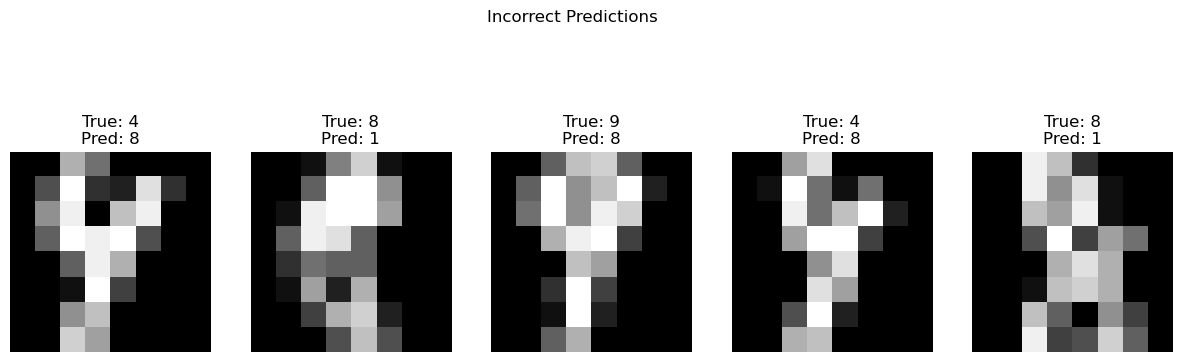

In [13]:
def plot_incorrect_predictions(X, y_true, y_pred, num_images=5):
    
    combined = zip(y_true, y_pred) #combine y_true , y_pred into a ordered pair
    incorrect_indices = []

    # Iterate through the ordered pair with indices
    for index, (true_label, predicted_label) in enumerate(combined):
        if true_label != predicted_label:
            incorrect_indices.append(index) #if label doesnt match prediction append
    
    print("Number of incorrect predictions : ", len(incorrect_indices))

    #limit the number of incorrect prediction displayed
    incorrect_indices = incorrect_indices[:num_images]

    # Plot the images with incorrect predictions
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(incorrect_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[idx].reshape(8, 8), cmap='gray')
        plt.title(f'True: {y_true[idx]}\nPred: {y_pred[idx]}')
        plt.axis('off')
    plt.suptitle('Incorrect Predictions')
    plt.show()

plot_incorrect_predictions(X_test, y_test, y_pred, num_images=5)
